In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd

In [ ]:
# https://www.kaggle.com/code/gaurav146/collaborative
# https://www.kaggle.com/code/wirachleelakiatiwong/travel-review-analysis/notebook
# https://www.kaggle.com/code/sankalpkumarbr/cluster-analysis-and-recommendation-systems
# I used some of the coding in these three links in my project. In addition, 
# I prepared the classification features and sections using the 2nd and 3rd link. 
# However, I prepared the recommendation section using link 1.

In [ ]:

df1 = pd.read_csv('/content/User.csv', header=0, index_col=False)
print(df1)



                    Name  Age     Sex               Category  \
0             Brown, Mia   30  Female               Wildlife   
1   LaRotonda, William     34    Male               Heritage   
2       Steans, Tyrone     31    Male               Heritage   
3        Howard, Estelle   32  Female             Pilgrimage   
4            Singh, Nan    30  Female               Heritage   
..                   ...  ...     ...                    ...   
94     Crimmings,   Jean   31  Female   Heritage, Pilgrimage   
95      Darson, Jene'ya    39  Female                 Museum   
96       DeGweck,  James   40    Male                  Musem   
97       Desimone, Carl    51    Male         Park, Heritage   
98     Dickinson, Geoff    35    Male               Wildlife   

                               Places  
0                          Jaipur Zoo  
1          Nahargarh Fort, Amber Fort  
2   Amer Fort / Amber Fort, Jal Mahal  
3           Birla Mandir, Jama Masjid  
4                          Hawa

In [ ]:
df2 = pd.read_csv('/content/data_collaborative.csv', header=0, index_col=False)
print(df2)


     userId  itemId  rating  timestamp
0         1       1     NaN  881250949
1         1       2     3.0  891717742
2         1       3     1.0  878887116
3         1       4     NaN  880606923
4         1       5     1.0  886397596
..      ...     ...     ...        ...
283       9      28     NaN  879456199
284       9      29     3.0  891450023
285       9      30     NaN  888205855
286       9      31     4.0  889651549
287       9      32     NaN  889124507

[288 rows x 4 columns]


In [ ]:

df3 = pd.read_csv('/content/data_content.csv', header=0, index_col=False)
print(df3)

                 category  distance          duration  \
0                Wildlife     6 Kms         1-2 Hours   
1                Heritage     6 Kms         1-2 Hours   
2                Heritage    13 Kms         2-3 Hours   
3              Pilgrimage     6 Kms         1-2 Hours   
4                Heritage     6 Kms           30 Mins   
5                Heritage     9 Kms           30 Mins   
6              Pilgrimage     6 Kms           30 Mins   
7                    Park    11 Kms            1 Hour   
8                Heritage   5.5 Kms         1-2 Hours   
9              Pilgrimage   6.5 Kms         1-2 Hours   
10               Heritage    14 Kms           30 Mins   
11               Heritage   5.5 Kms            1 Hour   
12             Pilgrimage    11 Kms         1-2 Hours   
13       Heritage, Museum     6 Kms         1-2 Hours   
14             Pilgrimage     7 Kms           30 Mins   
15               Heritage    11 Kms            1 Hour   
16   Heritage, Pilgrimage  13.5

In [ ]:
df1_description = df1.describe().round(2)
print(df1_description)


df2_description = df2.describe().round(2)
print(df2_description)


df3_description = df3.describe().round(2)
print(df3_description)

         Age
count  99.00
mean   38.85
std     8.81
min    27.00
25%    32.00
50%    37.00
75%    44.00
max    67.00
       userId  itemId  rating     timestamp
count  288.00  288.00  177.00  2.880000e+02
mean     5.00   16.50    3.49  8.827379e+08
std      2.59    9.25    1.16  5.244273e+06
min      1.00    1.00    1.00  8.747247e+08
25%      3.00    8.75    3.00  8.790111e+08
50%      5.00   16.50    4.00  8.813720e+08
75%      7.00   24.25    4.00  8.864069e+08
max      9.00   32.00    5.00  8.932777e+08
       p_rating   count  itemId
count     32.00   32.00   32.00
mean       3.50  410.47   16.50
std        1.28  304.36    9.38
min        1.00   13.00    1.00
25%        2.15  122.25    8.75
50%        3.85  381.00   16.50
75%        4.53  654.50   24.25
max        5.00  990.00   32.00


In [ ]:
print('Total missing values in dataset')
display(df1.isnull().sum())
df1 = df1.dropna()

print('Total missing values in dataset')
display(df2.isnull().sum())
df2 = df2.dropna()

print('Total missing values in dataset')
display(df3.isnull().sum())
df3 = df3.dropna()


Total missing values in dataset


Name        0
Age         0
Sex         0
Category    0
Places      0
dtype: int64

Total missing values in dataset


userId         0
itemId         0
rating       111
timestamp      0
dtype: int64

Total missing values in dataset


category         0
distance         0
duration         0
nearby_places    0
title            0
url              0
p_rating         0
count            0
itemId           0
dtype: int64

In [ ]:
Total = df1.isnull().sum().sort_values(ascending=False)          
Percent = (df1.isnull().sum()*100/df1.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data


,Total,Percentage of Missing Values
Name,0,0.0
Age,0,0.0
Sex,0,0.0
Category,0,0.0
Places,0,0.0


In [ ]:
Total = df2.isnull().sum().sort_values(ascending=False)          
Percent = (df2.isnull().sum()*100/df2.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data


,Total,Percentage of Missing Values
userId,0,0.0
itemId,0,0.0
rating,0,0.0
timestamp,0,0.0


In [ ]:
Total = df3.isnull().sum().sort_values(ascending=False)          
Percent = (df3.isnull().sum()*100/df3.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
category,0,0.0
distance,0,0.0
duration,0,0.0
nearby_places,0,0.0
title,0,0.0
url,0,0.0
p_rating,0,0.0
count,0,0.0
itemId,0,0.0


In [ ]:
print(df1.columns)

print(df2.columns)

print(df3.columns)

Index(['Name', 'Age', 'Sex', 'Category', 'Places'], dtype='object')
Index(['userId', 'itemId', 'rating', 'timestamp'], dtype='object')
Index(['category', 'distance', 'duration', 'nearby_places', 'title', 'url',
       'p_rating', 'count', 'itemId'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.ticker as ticker
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
# Pivot the data to have users as rows and itemid as columns
pivot_table = df2.pivot_table(index='userId', columns='itemId', values='rating')

# Fill missing values with 0 (assuming missing ratings as 0)
pivot_table = pivot_table.fillna(0)

# Convert the pivot table to a NumPy array
X = pivot_table.values


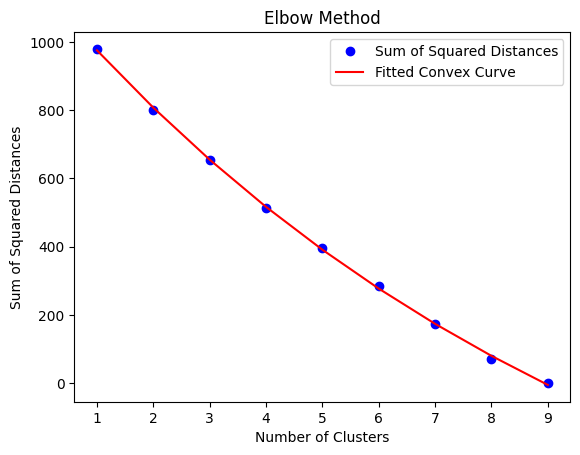

In [ ]:


# Define a list to store the sum of squared distances for each number of clusters
sse = []

# Try different numbers of clusters
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Define a function to fit a convex curve
def convex_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the convex curve to the data points
popt, _ = curve_fit(convex_func, range(1, 10), sse)

# Plot the sum of squared distances and the fitted convex curve
plt.plot(range(1, 10), sse, 'bo', label='Sum of Squared Distances')
plt.plot(range(1, 10), convex_func(range(1, 10), *popt), 'r-', label='Fitted Convex Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.legend()
plt.show()


In [ ]:
# Choose the optimal number of clusters (e.g., 4 in this example)
k = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get the cluster labels for each user
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
pivot_table['Cluster'] = cluster_labels


DBSCAN METHOD

In [ ]:
# Pivot the data to have users as rows and movies as columns
pivot_table = df2.pivot_table(index='userId', columns='itemId', values='rating')

# Fill missing values with 0 (assuming missing ratings as 0)
pivot_table = pivot_table.fillna(0)

# Convert the pivot table to a NumPy array
X = pivot_table.values


In [ ]:
# Fit DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# Get the cluster labels for each user
cluster_labels = dbscan.labels_

# Add the cluster labels to the DataFrame
pivot_table['Cluster'] = cluster_labels


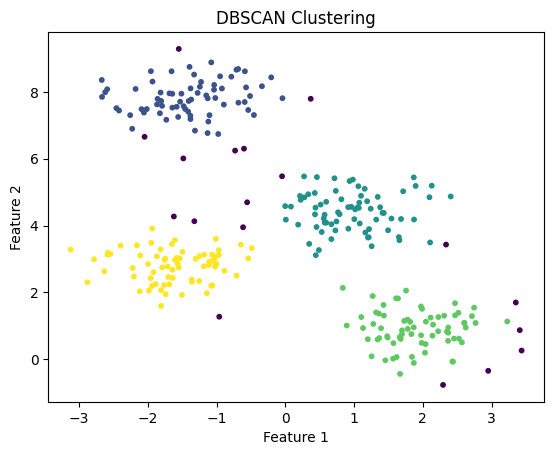

In [ ]:
# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Fit DBSCAN algorithm and get cluster labels
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
cluster_labels = dbscan.labels_

# Create a scatter plot of data points colored by cluster with increased density
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()


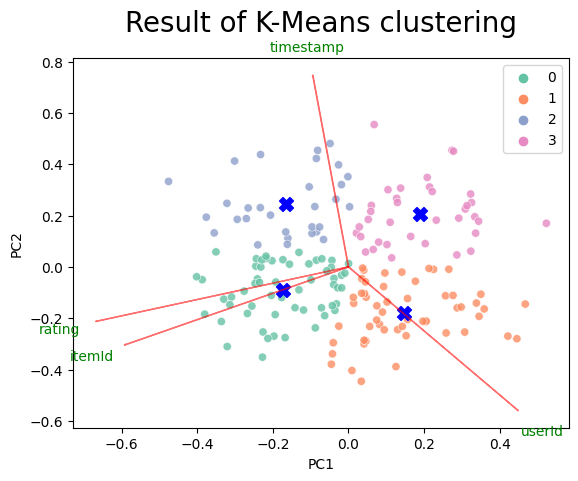

In [ ]:
df2_scaled = StandardScaler().fit_transform(df2)


pca = PCA(n_components = 2,random_state=42)
df2_PCA_scaled = pca.fit_transform(df2_scaled)

model = KMeans(n_clusters=4,random_state=42)
model.fit(df2_PCA_scaled)
cluster = model.labels_

labels = list(df2.columns)

xs = df2_PCA_scaled[:,0]
ys = df2_PCA_scaled[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
# Create a scatter plot of each data point
g = sns.scatterplot(x = xs* scalex, y = ys* scaley, hue=cluster, palette='Set2', alpha=0.8)

# Add cluster centroids
plt.scatter(x=model.cluster_centers_[:,0]*scalex, y=model.cluster_centers_[:,1]*scaley, color='b', s=100, marker='X')

# Add EigenVectors representing how each attraction categories relate to PC1 and PC2
for i in range(n):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
    plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')

g.set_xlabel("PC{}".format(1))
g.set_ylabel("PC{}".format(2))
g.set_title('Result of K-Means clustering', y=1.05, fontsize=20)

# Save the plot to a file
plt.savefig('Clustering Result.png')

# Display the plot
plt.show()



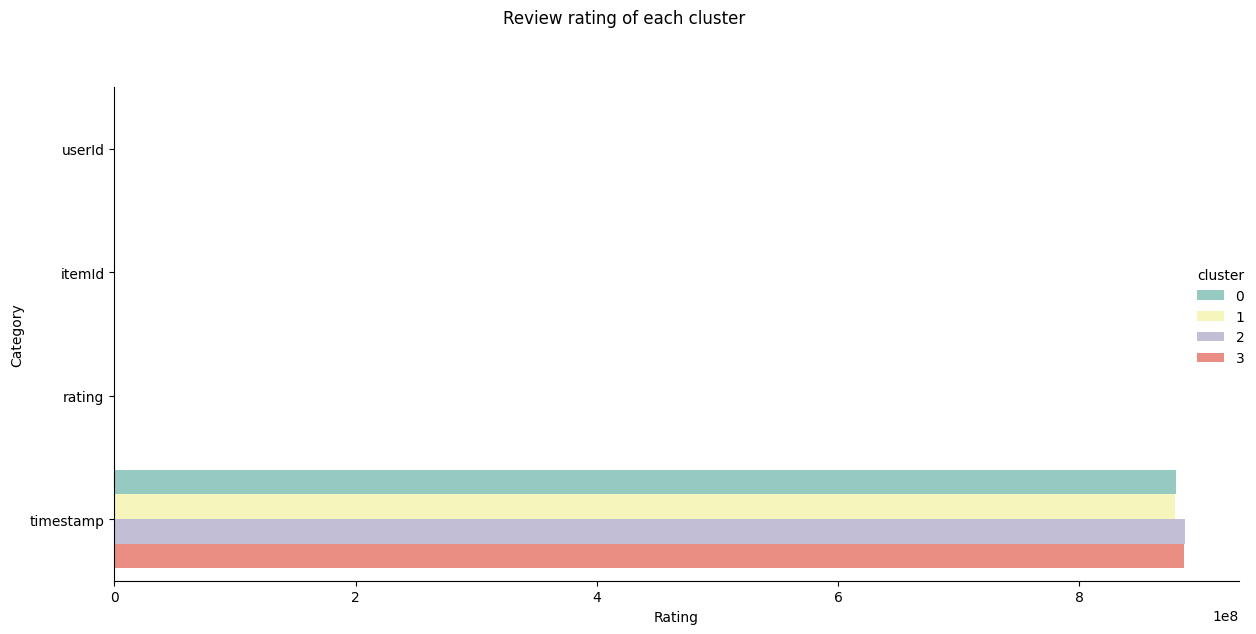

In [ ]:
df2['cluster'] = model.labels_
df2_long = pd.melt(df2, id_vars=["cluster"], value_vars=list(df2.columns[:-1]), var_name="categories", value_name="value")
g = sns.catplot(data=df2_long, y="categories", x="value", kind="bar", hue="cluster", ci=None, estimator=np.median, palette='Set3', height=6, aspect=2)
g.fig.suptitle('Review rating of each cluster', y=1.05, ha='center')
g.set(xlabel='Rating', ylabel='Category')
plt.tight_layout()
plt.savefig('Review rating of each cluster.png', dpi=300)


In [ ]:
kmeans = KMeans(n_clusters=5,random_state=4)
kmeans.fit(df2_scaled)

KMeans(n_clusters=5, random_state=4)

In [ ]:
# value-counts for the cluster
cl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
cl.value_counts()

Cluster
1          47
0          46
3          44
4          24
2          16
dtype: int64

hierarhical clustering method

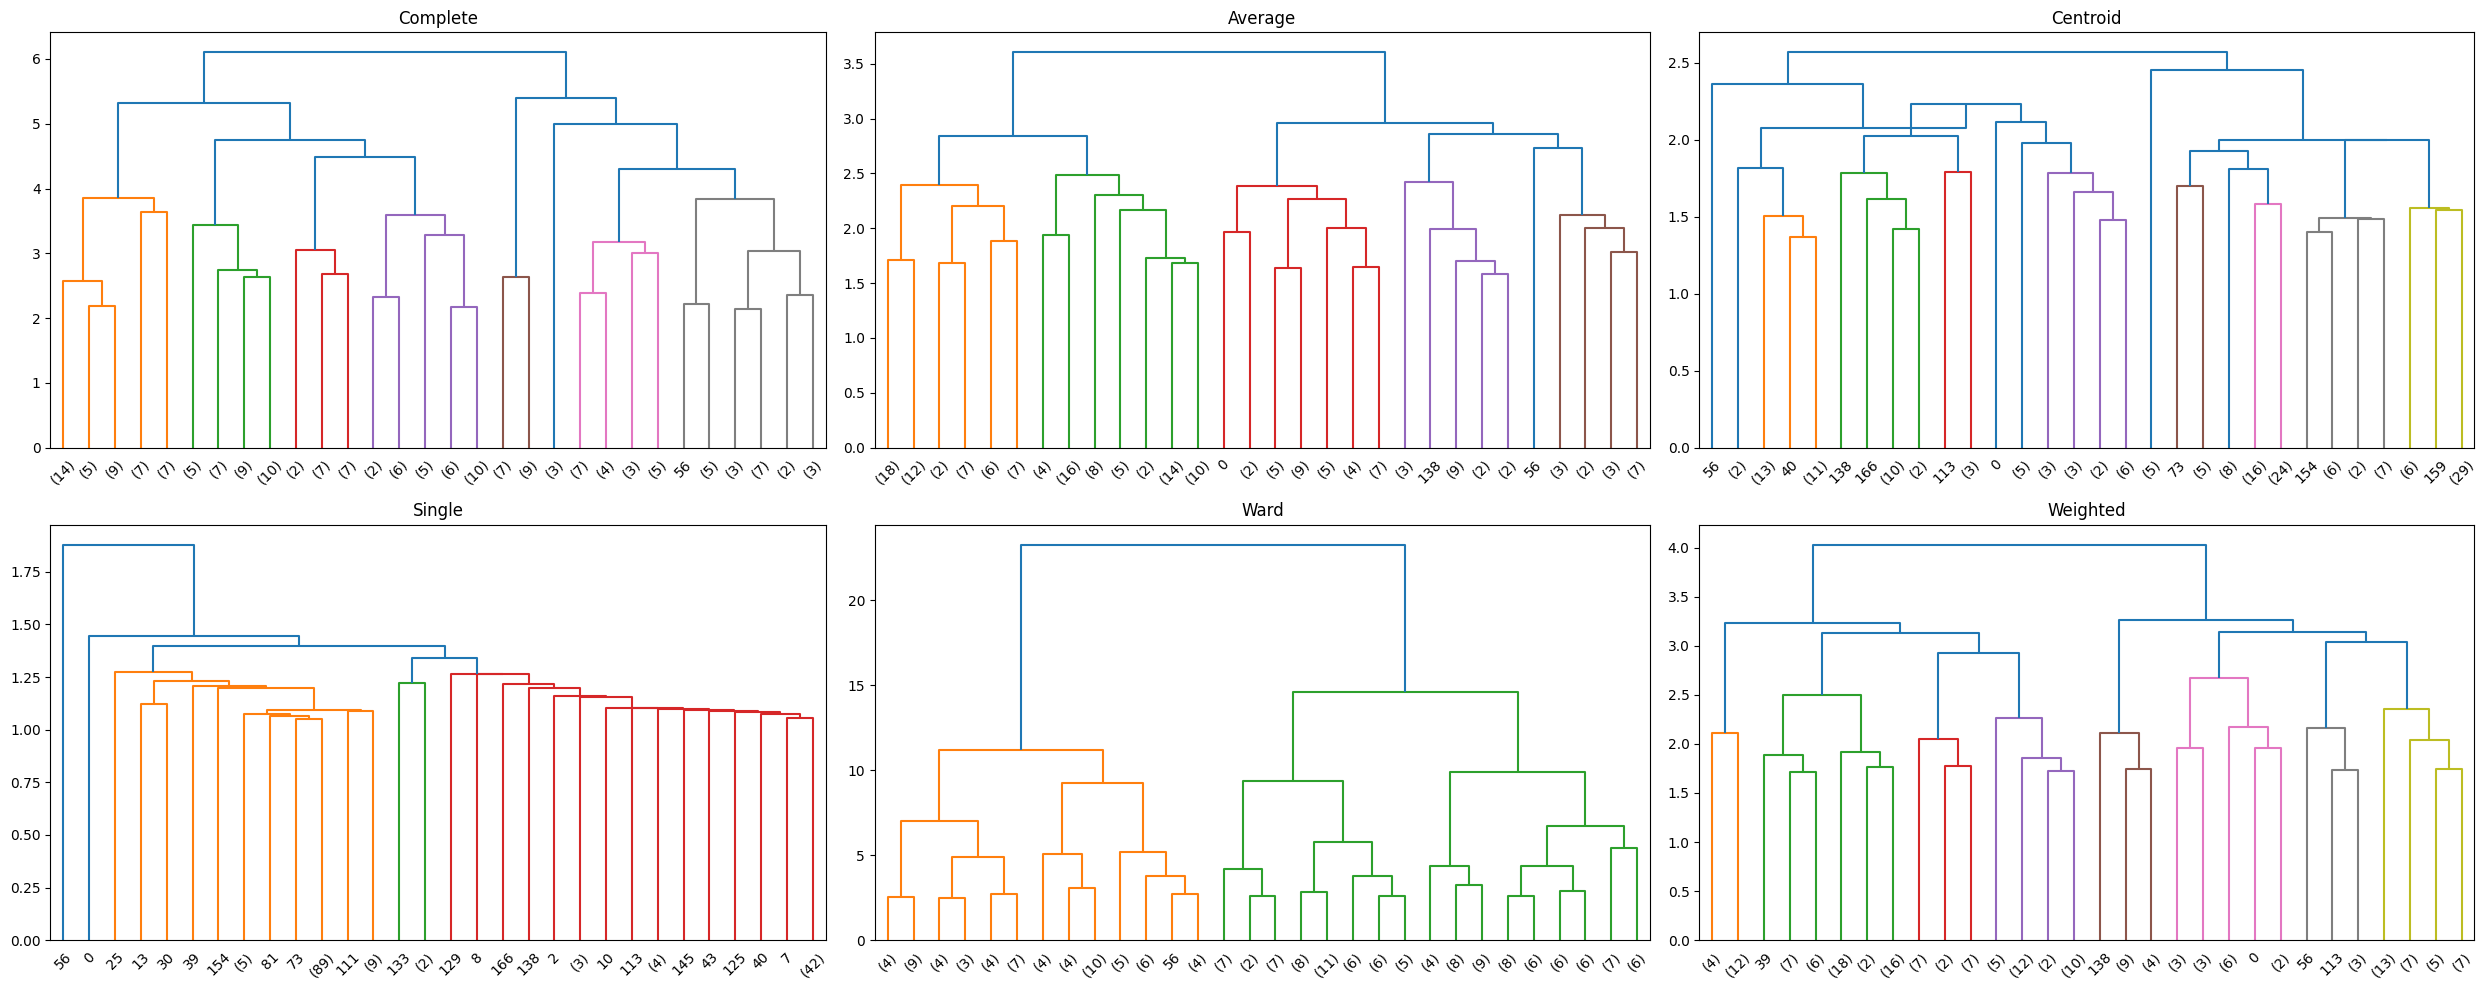

In [ ]:
import scipy.cluster.hierarchy as sch
# Define the linkage methods
linkage_methods = ['complete', 'average', 'centroid', 'single', 'ward', 'weighted']

# Create the subplots
fig, axs = plt.subplots(2, 3, figsize=(25,10))

scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

# Loop through the methods and plot the dendrograms
for i, method in enumerate(linkage_methods):
    # Compute the linkage matrix
    Z = sch.linkage(df2_scaled, method=method, metric='euclidean')
    
    # Plot the dendrogram
    dendrogram = sch.dendrogram(Z, truncate_mode='lastp', ax=axs[i//3,i%3])
    
    # Set the title for the subplot
    axs[i//3,i%3].set_title(method.capitalize())

# Display the dendrograms
plt.tight_layout()
plt.show()


recommendation part

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import correlation


data = pd.read_csv('/content/data_collaborative.csv')
placeInfo = pd.read_csv('/content/data_content.csv')

data = pd.merge(data, placeInfo, on='itemId')

userItemRatingMatrix = pd.pivot_table(data, values='rating', index='userId', columns='itemId')


def favoritePlace(activeUser,N):
    topPlace=pd.DataFrame.sort_values(
        data[data.userId==activeUser],['rating'],ascending=[0])[:N]
    return list(topPlace.title)

userItemRatingMatrix=pd.pivot_table(data, values='rating', index=['userId'], columns=['itemId'])



def similarity(user1, user2, metric='cosine'):
    try:
        user1 = np.array(user1) - np.nanmean(user1)
        user2 = np.array(user2) - np.nanmean(user2)
        commonItemIds = [i for i in range(len(user1)) if user1[i] > 0 and user2[i] > 0]
        if len(commonItemIds) == 0:
            return 0
        else:
            user1 = np.array([user1[i] for i in commonItemIds])
            user2 = np.array([user2[i] for i in commonItemIds])
            if metric == 'cosine':
                return cosine_similarity([user1], [user2])[0][0]
            elif metric == 'euclidean':
                return np.linalg.norm(user1 - user2)
            elif metric == 'correlation':
                 return correlation(user1,user2)
    except ZeroDivisionError:
        print("You can't divide by zero!")

def nearestNeighbourRatings(activeUser, K, metric='cosine'):
    try:
        similarityMatrix = pd.DataFrame(index=userItemRatingMatrix.index, columns=['Similarity'])
        for i in userItemRatingMatrix.index:
            similarityMatrix.loc[i] = similarity(userItemRatingMatrix.loc[activeUser],
                                                userItemRatingMatrix.loc[i], metric=metric)
        similarityMatrix = pd.DataFrame.sort_values(similarityMatrix, 'Similarity', ascending=False)
        nearestNeighbours = similarityMatrix[:K]
        neighbourItemRatings = userItemRatingMatrix.loc[nearestNeighbours.index]
        predictItemRating = pd.DataFrame(index=userItemRatingMatrix.columns, columns=['Rating'])
        for i in userItemRatingMatrix.columns:
            predictedRating = np.nanmean(userItemRatingMatrix.loc[activeUser])
            for j in neighbourItemRatings.index:
                if userItemRatingMatrix.loc[j, i] > 0:
                    predictedRating += (userItemRatingMatrix.loc[j, i] - np.nanmean(userItemRatingMatrix.loc[j])) * \
                                       nearestNeighbours.loc[j, 'Similarity']
            predictItemRating.loc[i, 'Rating'] = predictedRating
    except ZeroDivisionError:
        print("You can't divide by zero!")
    return predictItemRating

def topNRecommendations(activeUser, N, K, metric='cosine'):
    try:
        predictItemRating = nearestNeighbourRatings(activeUser, K, metric=metric)
        placeAlreadyWatched = list(userItemRatingMatrix.loc[activeUser].loc[userItemRatingMatrix.loc[activeUser] > 0].index)
        predictItemRating = predictItemRating.drop(placeAlreadyWatched)
        topRecommendations = pd.DataFrame.sort_values(predictItemRating, 'Rating', ascending=False)[:N]
        topRecommendationTitles = placeInfo.loc[placeInfo.itemId.isin(topRecommendations.index)]
    except ZeroDivisionError:
        print("You can't divide by zero!")
    return list(topRecommendationTitles.title)

activeUser = int(input("Enter userid: "))
print("The recommended places for you are: ")
print("The user's top pf the fav. places are: ")
for i in range(activeUser):
      print(favoritePlace(activeUser,i))
      
print(topNRecommendations(activeUser, N=4, K=10, metric='euclidean'))

print(topNRecommendations(activeUser, N=4, K=10, metric='cosine'))

print(topNRecommendations(activeUser, N=4, K=10, metric='correlation'))


Enter userid: 4
The recommended places for you are: 
The user's top pf the fav. places are: 
[]
['Govind Devji Temple']
['Govind Devji Temple', 'Maharani Ki Chhatri']
['Govind Devji Temple', 'Maharani Ki Chhatri', 'Anokhi Museum Of Hand Printing']
['Akshardham Temple', 'Rambagh Palace', 'Jaigarh Fort', 'Statue Circle / Sawai Jai Singh Circle']
['Akshardham Temple', 'Rambagh Palace', 'Amar Jawan Jyoti', 'SRC Museum Of Indology']
['Nahargarh Fort', 'Birla Mandir', 'Hawa Mahal', 'City Palace / Sawai Man Singh II Museum']
